<a href="https://colab.research.google.com/github/anupstar100/Employee-Salaries/blob/main/Employee_Salary_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Salary Project

### **Problem Statement**
To predict the salary of employee based on the information provided in the dataset.

### **How will the company profit from this solution?**
1. Companies can't keep track of their finance while paying salaries to employees.
2. Companies can understand what factors affects their finance. for example: location , employee experience, education qualification, etc.
3. Companies can get data about their competition companies finance and improve their own on basis of that data.
4. They can get an optimized range of salaries that should be given to their employees based on factors such as job type, employee experience, Education qualification, etc. that will reduce spending of extra  money.

### **How will the employee profit from this solution?**

1. Employees find it difficult to know what factors affect their salaries.
2. Employees can find companies matching their salary requirement based on job title, experience, etc.
3. They can understand what factor is affecting their salaries so they can improve working on that factor. 
4. They can get data about salaries paid by other companies for same job title, experience, education qualification, etc so they can to get a raise in their salaries.

Dataset link: https://www.kaggle.com/datasets/pavanelisetty/salarypredictions
### **Dataset Desciption**

The dataset folder contains the following files:

train_dataset.csv = 1000000 x 8

train_salaries.csv = 1000000 x 2

test_dataset.csv =  1000000 x 8

Columns Provided in the Dataset

1. jobId
2. companyId
3. jobType
4. degree
5. major
6. industry
7. yearsExperience
8. milesFromMetropolis
9. salary

In [24]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# reading the data
train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Employee Salary/train_dataset.csv')
train_data_salary = pd.read_csv('/content/drive/MyDrive/Datasets/Employee Salary/train_salaries.csv')

In [4]:
# glimpses of our data
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
train_data_salary.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
# combining train_data and train_data_salary and making a df
df = pd.merge(train_data, train_data_salary, how = 'inner', on = 'jobId')
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### Preparing dataset for modelling

In [7]:
# dropping jobId and companyId
df.drop(['jobId', 'companyId'], axis = 1, inplace = True)

In [8]:
df.sample(4)

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
434028,JUNIOR,BACHELORS,CHEMISTRY,HEALTH,22,85,87
224727,MANAGER,DOCTORAL,COMPSCI,AUTO,21,26,168
758241,SENIOR,HIGH_SCHOOL,NONE,OIL,11,3,126
113100,SENIOR,HIGH_SCHOOL,NONE,FINANCE,13,64,98


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobType              1000000 non-null  object
 1   degree               1000000 non-null  object
 2   major                1000000 non-null  object
 3   industry             1000000 non-null  object
 4   yearsExperience      1000000 non-null  int64 
 5   milesFromMetropolis  1000000 non-null  int64 
 6   salary               1000000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 61.0+ MB


In [10]:
# creating dummy variables
df = pd.get_dummies(df, drop_first = True)
df.columns

Index(['yearsExperience', 'milesFromMetropolis', 'salary', 'jobType_CFO',
       'jobType_CTO', 'jobType_JANITOR', 'jobType_JUNIOR', 'jobType_MANAGER',
       'jobType_SENIOR', 'jobType_VICE_PRESIDENT', 'degree_DOCTORAL',
       'degree_HIGH_SCHOOL', 'degree_MASTERS', 'degree_NONE', 'major_BUSINESS',
       'major_CHEMISTRY', 'major_COMPSCI', 'major_ENGINEERING',
       'major_LITERATURE', 'major_MATH', 'major_NONE', 'major_PHYSICS',
       'industry_EDUCATION', 'industry_FINANCE', 'industry_HEALTH',
       'industry_OIL', 'industry_SERVICE', 'industry_WEB'],
      dtype='object')

In [11]:
# X, y
X = df.drop('salary', axis = 1)
y = df['salary']

In [12]:
# adding constant for statsmodels
X_sm = sm.add_constant(X)

In [13]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y, test_size = 0.2)

In [14]:
# fitting to our model
sm_model = sm.OLS(y_train, X_train).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                 8.572e+04
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        04:52:58   Log-Likelihood:            -3.5161e+06
No. Observations:              800000   AIC:                         7.032e+06
Df Residuals:                  799972   BIC:                         7.033e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    134

* Our model is explaining 74% variance.

In [15]:
# predicting and calculating the scores
y_pred = sm_model.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.7450995466869508
MAE: 15.826947385699889
RMSE: 19.585472436030148


In [20]:
# using different random states and using sklearn
r2 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_sm, y, test_size = 0.2, random_state = i)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r2.append(r2_score(y_test, y_pred))

In [21]:
# checking for max score
np.argmax(r2)

11

In [22]:
# we are getting the same score
r2[11]

0.745673974200179

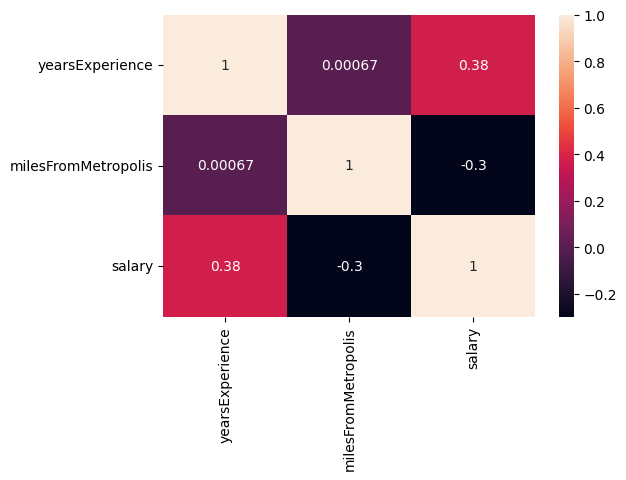

In [23]:
# checking correlation
num_features = ['yearsExperience', 'milesFromMetropolis', 'salary']
sns.heatmap(df[num_features].corr(), annot = True)

* There are no features with high correlation.

In [26]:
# checking for vif
vif_data = pd.DataFrame()
vif_data['Features'] = num_features
vif_data['vif'] = [variance_inflation_factor(df[num_features], i) for i in range(len(num_features))]

TypeError: ignored